In [1]:
import tensorflow as tf
from os import listdir,rename
from matplotlib import pyplot as plt
import numpy as np
from keras import *
from keras.layers import Conv2D,Conv3D, MaxPooling2D
from keras.models import Sequential
from pylab import *
import cv2
from os.path import isfile, join
from IPython.display import Image,display
%matplotlib inline
%pylab inline


Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


c:\python\python interpreter\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'info', 'linalg', 'fft', 'power']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


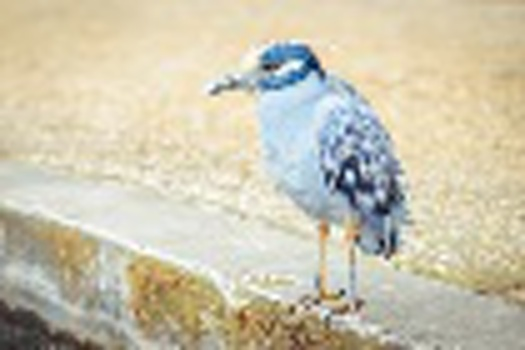

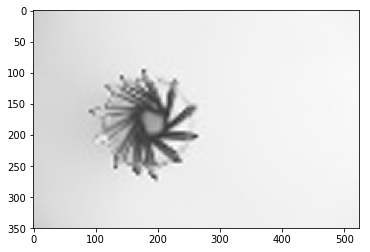

In [2]:
path="D:/ML Papers HRS/LowtoHIGH/BICUBIC_525x350"
paths="D:/ML Papers HRS/LowtoHIGH/HIGH_525x350"
input_imgs = [f for f in listdir(path) if isfile(join(path, f))]
output_imgs = [f for f in listdir(paths) if isfile(join(paths, f))]

#plt.imshow(imread(input_imgs[3]))
#plt.show()
display(Image(filename=path+"/"+input_imgs[2]))
a=0
for i in {input_imgs[0]} :
    a+=1
    #print(i)
    yub=cv2.cvtColor(cv2.imread(path+"/"+i),cv2.COLOR_BGR2YUV)
    y,u,v=cv2.split(yub)
    #print(cv2.imread(path+"/"+i))
    y = cv2.cvtColor(y, cv2.COLOR_GRAY2BGR)
    #u = cv2.cvtColor(u, cv2.COLOR_GRAY2BGR)
    #v = cv2.cvtColor(v, cv2.COLOR_GRAY2BGR)
    #print(y.shape)
    #plt.imshow((imread(y))
    #plt.show()    
    #img=np.vstack([y,u,v])
    pylab.imshow(y)
    

    
 

In [3]:
a=cv2.imread(path+"/"+input_imgs)
a.shape()

TypeError: must be str, not list

In [ ]:

model = Sequential()
model.add(Conv2D(12, kernel_size=(3, 3), kernel_initializer='glorot_uniform', bias_initializer='zeros',use_bias=True,strides=(1,1),activation='relu',padding="SAME",data_format="channels_last",input_shape=(525,350,3)))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(3, (3,3),padding="SAME",kernel_initializer='glorot_uniform', bias_initializer='zeros',use_bias=True, activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Flatten())
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(num_classes, activation='softmax'))

class AccuracyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()
#inp=[cv2.imread(path+"/"+f) for f in listdir(path) if isfile(join(path, f)) ]
#out=[cv2.imread(paths+"/"+f) for f in listdir(paths) if isfile(join(paths, f)) ]
#print(inp[2])
inp=np.array(inp)
out=np.array(out)
model.compile(loss=losses.mean_squared_error,optimizer=optimizers.Adam(),metrics=['accuracy'])
model.fit(x=inp,y=out,batch_size=128,epochs=10,verbose=1, callbacks=[history])     
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
x = tf.placeholder(tf.float32, shape=(None,525, 350,3))
y = tf.placeholder(tf.float32,shape(None,525,350,3))
w_conv1=tf.Variable(t)



